<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Capstone_Classification_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
# !pip install importlib
# !pip install imp

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#!pip install import_ipynb

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
import os
import import_ipynb
import anno
import anno_auto
import importlib

importing Jupyter notebook from anno.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
importing Jupyter notebook from anno_auto.ipynb
Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:03<00:00, 67.1MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/root/stanfordnlp_resources

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
books = ["gables", "avonlea", "island", "dreams"]
urls = ["https://www.gutenberg.org/files/45/45-0.txt", "https://www.gutenberg.org/files/47/47-0.txt", "https://www.gutenberg.org/files/51/51-0.txt", "http://www.gutenberg.org/cache/epub/544/pg544.txt"]

for i in range(len(books)):
    page = requests.get(urls[i])
    file = open("{}.txt".format(books[i]) , "w+")
    file.write(page.text)
    file.close()

file = open("gables.txt", "r")
gables = file.read()
file = open("avonlea.txt", "r")
avonlea = file.read()
file = open("island.txt", "r")
island = file.read()
file = open("dreams.txt", "r")
dreams = file.read()

In [0]:
# import gensim
# must download & load for word2vec_average_doc function to work
# # Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  

In [0]:
from gensim.parsing.preprocessing import preprocess_documents
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

#returns vector representation of documents 
def word2vec_average_doc(documents):
    model_new = Word2Vec(size=300, min_count=1)
    model_new.build_vocab(documents)
    total_examples = model_new.corpus_count
    model_new.build_vocab([list(model_new.wv.vocab.keys())], update=True) #fishy here, changed model to model_new within list bracket
    model_new.intersect_word2vec_format("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz", binary = True)
    model_new.train(documents, total_examples=total_examples, epochs=model_new.iter)
    mean_vectors = []
    processed = preprocess_documents(documents)
    for i in processed:
        summation = []
        for e in i:
            try:
                summation.append(model_new[e])
            except KeyError:
                #print("debug")
                next
        if len(summation)!=0:
            mean_vectors.append(np.mean(summation, axis = 0))
        else:
            mean_vectors.append(np.mean(mean_vectors, axis = 0))
        
        #print(summation)
    return np.array(mean_vectors)

In [0]:
# full_para_list_gables = anno.paragraph_list(gables)
# full_para_list_dreams = anno.paragraph_list(dreams)

In [0]:
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument


# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(full_para_list_gables)]
# model_d2v = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)
# # vector = model_d2v.infer_vector(["system", "response"])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


#function for training classifier
def train_classifier(full_para_list, target, prnt = True, d2v=True):
    vectorizer = CountVectorizer()
    n=len(target)

    x_lst = []
    for i in full_para_list[:n]:
        x_lst.extend(i) 
    vectorized = vectorizer.fit_transform(x_lst)
    x = vectorized.todense()

#     x = word2vec_average_doc(x_lst) 
#     x = model_d2v.infer_vector(x_lst)
#     print(x)

#     print(x)
    y = []
    for i in target[:n]:
        y.extend(i) 
    y = [0 if i!=1 else 1 for i in y]
    ind_0 = [e for e, i in enumerate(y) if i==0]
    ind_1 = [e for e, i in enumerate(y) if i==1]
#     print(ind_0, ind_1)
        
    if len(ind_0)>len(ind_1):
        new_indices = random.sample(ind_0, len(ind_1))
        x = np.vstack([x[new_indices], x[ind_1]])
        y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_1))]
    else:
        new_indices = sample(ind_1, len(ind_0))
        x = np.vstack([x[new_indices], x[ind_0]])
        y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_0))]


    model2 = LogisticRegression(solver='lbfgs', multi_class='multinomial')
   # X_train, X_test, y_train, y_test = train_test_split(x, y)
    model2.fit(x, y)
#     if prnt==True:
#         print(model2.score(X_test, y_test))
#         y_pred = model2.predict(X_test)
#         print(precision_score(y_test, y_pred,  pos_label = 1))
#         print(precision_score(y_test, y_pred,  pos_label = 0))
#         print(recall_score(y_test, y_pred, pos_label = 1))
#         print(recall_score(y_test, y_pred, pos_label = 0 ))
#         print(confusion_matrix(y_test, y_pred))
#         tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#         print(tn, fp, fn, tp)
    return model2, vectorizer

In [0]:
import random

# for checking performance of trained classifiers on books
def test(full_para_list, model2, vectorizer, target, d2v=False):
    n = len(target)
    x_lst = []
    for i in full_para_list:
        x_lst.extend(i) 
    print(x_lst)
    if d2v!=True:
      vectorized = vectorizer.transform(x_lst)
    else:
      vectorized = vectorizer.infer_vector(x_lst)

    x = vectorized.todense()
#     x = word2vec_average_doc(x_lst) 
#     x = vectorizer.infer_vector(x_lst)
    y = []
    for i in target:
        y.extend(i) 

    y = [0 if i!=1 else 1 for i in y]
    ind_0 = [e for e, i in enumerate(y) if i==0]
    ind_1 = [e for e, i in enumerate(y) if i==1]

    if len(ind_0)>len(ind_1):
        new_indices = random.sample(ind_0, len(ind_1))
        #print(x.shape)
        x = np.vstack([x[new_indices], x[ind_1]])
        
        y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_1))]
    else:
        new_indices = sample(ind_1, len(ind_0))
        x = np.vstack([x[new_indices], x[ind_0]])
        y = [0 for i in range(len(new_indices))] + [1 for i in range(len(ind_0))]

    print(model2.score(x, y))
    y_pred = model2.predict(x)
    print("precision, label = 1")
    print(precision_score(y, y_pred,  pos_label = 1))
    print("precision, label = 0")
    print(precision_score(y, y_pred,  pos_label = 0))
    print("recall, label = 1")
    print(recall_score(y, y_pred, pos_label = 1))
    print("recall, label = 0")
    print(recall_score(y, y_pred, pos_label = 0 ))

    print(confusion_matrix(y, y_pred))
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print(tn, fp, fn, tp)
    print()

#     words = np.array(vectorizer.get_feature_names())
#     words[np.argsort(abs(model2.coef_[0]))[-10:]], model2.coef_[0][abs(np.argsort(model2.coef_[0]))[-10:]]
    
# print("trained on AGG, tested on AGG (control)")
# model2, vectorizer = train_classifier(full_para_list_gables, anno.return_target("gables"), prnt = False)
# test(full_para_list_gables, model2, vectorizer, anno.return_target("gables"))

# print("trained on AGG, tested on AHD")
# model2, vectorizer = train_classifier(full_para_list_gables, anno.return_target("gables"), prnt = False)
# test(full_para_list_dreams, model2, vectorizer, anno.return_target("dreams"))

# print("trained on AHD, tested on AHD (control)")
# model2, vectorizer = train_classifier(full_para_list_dreams,anno.return_target("dreams"), prnt = False)
# test(full_para_list_dreams, model2, vectorizer, anno.return_target("dreams"))

# print("trained on AHD, tested on AGG")
# model2, vectorizer = train_classifier(full_para_list_dreams, anno.return_target("dreams"), prnt = False)
# test(full_para_list_gables, model2, vectorizer, anno.return_target("dreams"))

In [0]:
sentence_gables, target_gables = anno_auto.return_nsubj("gables")
sentence_dreams, target_dreams = anno_auto.return_nsubj("dreams")

In [0]:
# sentence_gables_Marilla, target_gables_Marilla = anno_auto.return_nsubj("gables", "Marilla")


In [37]:
#as compared to other nsubj sentences

X_train, X_test, y_train, y_test = train_test_split(sentence_gables, target_gables)
X_train_dreams, X_test_dreams, y_train_dreams, y_test_dreams = train_test_split(sentence_dreams, target_dreams)

print("trained on AGG, tested on AGG (control)")
model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
test(X_test, model2, vectorizer, y_test)

print("trained on AGG, tested on AHD")
model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
test(X_test_dreams, model2, vectorizer, y_test_dreams)

print("trained on AHD, tested on AHD (control)")
model2, vectorizer = train_classifier(X_train_dreams,y_train_dreams, prnt = False)
test(X_test_dreams, model2, vectorizer, y_test_dreams)

print("trained on AHD, tested on AGG")
model2, vectorizer = train_classifier(X_train_dreams,y_train_dreams, prnt = False)
test(X_test, model2, vectorizer, y_test)

trained on AGG, tested on AGG (control)
['I hate her husband -- I just hate him furiously .', 'During the forenoon she kept the child busy with various tasks and watched over her with a keen eye while she did them .', 'Marilla turned quickly away to hide her twitching face ; but it was no use ; she collapsed on the nearest chair and burst into such a hearty and unusual peal of laughter that Matthew , crossing the yard outside , halted in amazement .', 'He does nâ \x80\x99t generally go to town this time of year and he _never _ visits ; if heâ\x80\x99d run out of turnip seed he would nâ\x80\x99t dress up and take the buggy to go for more ; he wasnâ\x80\x99t driving fast enough to be going for a doctor .', 'That sad one was simply splendid .â\x80\x9d', 'You may convert to and distribute this work in any binary , compressed , marked up , nonproprietary or proprietary form , including any word processing or hypertext form .', 'Youâ\x80\x99re so much more dignified than I am .', 'I â\x80 \x

In [17]:
#as compared to other nsubj sentences, using Marilla as comparison
X_train, X_test, y_train, y_test = train_test_split(sentence_gables, target_gables)
X_train_dreams, X_test_dreams, y_train_dreams, y_test_dreams = train_test_split(sentence_dreams, target_dreams)

print("trained on AGG, tested on AGG")
model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
test(sentence_gables, model2, vectorizer, target_gables)

print("trained on AGG, tested on AGG (control)(Marilla)")
model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
test(sentence_gables_Marilla, model2, vectorizer, target_gables_Marilla)

print("trained on AHD, tested on AGG(Marilla) (control)")
model2, vectorizer = train_classifier(X_train_dreams, y_train_dreams, prnt = False)
test(sentence_gables_Marilla, model2, vectorizer, target_gables_Marilla)

print("trained on AHD, tested on AHD")
model2, vectorizer = train_classifier(X_train_dreams, y_train_dreams, prnt = False)
test(X_test_dreams, model2, vectorizer, y_test_dreams)

# print("trained on AGG, tested on AHD")
# model2, vectorizer = train_classifier(X_train, y_train, prnt = False)
# test(X_test_dreams, model2, vectorizer, y_test_dreams)

# print("trained on AHD, tested on AHD (control)")
# model2, vectorizer = train_classifier(X_train_dreams,y_train_dreams, prnt = False)
# test(X_test_dreams, model2, vectorizer, y_test_dreams)

# print("trained on AHD, tested on AGG")
# model2, vectorizer = train_classifier(X_train_dreams,y_train_dreams, prnt = False)
# test(X_test, model2, vectorizer, y_test)

trained on AGG, tested on AGG


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.81237721021611
precision, label = 1
0.75
precision, label = 0
0.9162303664921466
recall, label = 1
0.93713163064833
recall, label = 0
0.68762278978389
[[350 159]
 [ 32 477]]
350 159 32 477

trained on AGG, tested on AGG (control)(Marilla)
0.643344709897611
precision, label = 1
0.6532846715328468
precision, label = 0
0.6346153846153846
recall, label = 1
0.6109215017064846
recall, label = 0
0.6757679180887372
[[198  95]
 [114 179]]
198 95 114 179

trained on AHD, tested on AGG(Marilla) (control)
0.6040955631399317
precision, label = 1
0.5868945868945868
precision, label = 0
0.6297872340425532
recall, label = 1
0.7030716723549488
recall, label = 0
0.5051194539249146
[[148 145]
 [ 87 206]]
148 145 87 206

trained on AHD, tested on AHD
0.6134453781512605
precision, label = 1
0.6097560975609756
precision, label = 0
0.6173913043478261
recall, label = 1
0.6302521008403361
recall, label = 0
0.5966386554621849
[[71 48]
 [44 75]]
71 48 44 75



In [0]:
import matplotlib.pyplot as plt
import networkx as nx

#function for visualizing character networks in a book
def gr(full_para_list):
    a = np.zeros((20, 20))

    x_lst = []
    for i in full_para_list:
        x_lst.extend(i) 
    # vectorized = vectorizer.transform(x_lst)

    for i in x_lst:
        chars = name_mapping.keys()
        dis_chars = []
        for ch in chars:
            if re.search(ch, i) and ch not in dis_chars:
                dis_chars.append(ch)
        for ch in dis_chars:
            for neighbor in dis_chars:
                a[name_mapping[ch]][name_mapping[neighbor]] += 1

    g1 = (nx.from_numpy_matrix((a- min(a.flatten()))/(max(a.flatten()) - min(a.flatten()))))
    #g1 = (nx.from_numpy_matrix((a)
    pos = nx.spring_layout(g1, k =1)
    weights = [g1[u][v]['weight'] for u,v in g1.edges]
    nx.draw(g1, pos = pos, width = weights)
    nx.draw_networkx_labels(g1, labels = dict(map(reversed, name_mapping.items())), pos = pos)
    plt.show()
    return a
    


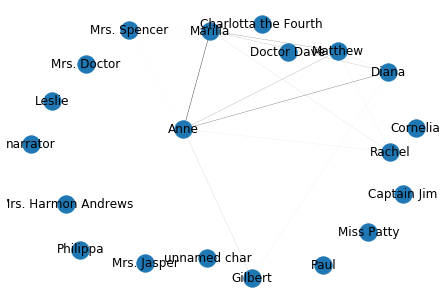

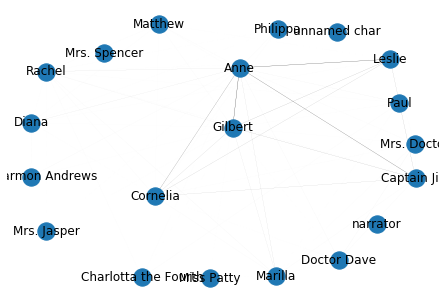

193.0 58.0
64.0 131.0


In [0]:
a_gables = gr(full_para_list_gables)
a_dreams = gr(full_para_list_dreams)

#printing co-occurrence values for Anne with Diana & Gilbert in AGG
print(a_gables[1][6], a_gables[1][4])
#printing co-occurrence values for Anne with Cornelia & Gilbert in AHD
print(a_dreams[1][15], a_dreams[1][4])

In [0]:
train_classifier(full_para_list_gables, target_gables, prnt = False)

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words=None,
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None))

In [0]:
import anno